# Spam classifier


***
> A spam filter is a program that is used to detect unsolicited and unwanted email and prevent those messages from getting to a user's inbox. Like other types of filtering programs, a spam filter looks for certain criteria on which it bases flags an email as d. 

>In this notebook, we will implement a spam filtering model using various algorithms, and then we will evaluate our model performance and select the best one.
# 📝 Goals:

> 1. Representing text as numerical data
> 2. Reading a text-based dataset into pandas
> 3. Vectorizing our dataset
> 4. Building and evaluating a model


---



In [3]:
import os
import tarfile
import urllib.request
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline


Loading first data set

In [4]:
SPAM = "./datasets/spam/spam.csv"
df_spam = pd.read_csv(SPAM)
df_spam

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will �_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


**Dropping the unwanted columns Unnamed:2, Unnamed: 3 and Unnamed:4**

In [5]:
df_spam = df_spam.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
df_spam = df_spam.rename(columns={"v1":"label", "v2":"message"})

In [6]:
df_spam.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
#Checking the maximum length of SMS
print (len(df_spam))

5572


In [8]:
df_spam.tail()

,label,message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


<h2 style="color:#2467C0">Data Cleaning: Handling Missing Data</h2>


In [9]:
df_spam.isnull().any().any()

False

# 🔍 Exploratory Data Analysis (EDA)

In [10]:
#Number of observations in each label spam and ham
df_spam.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [11]:

labels = ['ham', 'spam']
counts = [4825, 747]
ypos = np.arange(len(labels))
ypos

array([0, 1])

<BarContainer object of 2 artists>

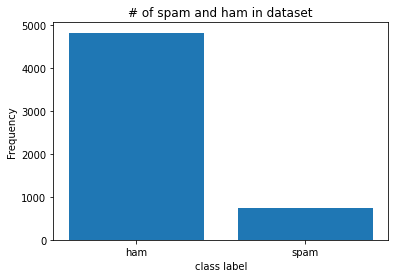

In [12]:
plt.xticks(ypos, labels)
plt.xlabel("class label")
plt.ylabel("Frequency")
plt.title("# of spam and ham in dataset")
plt.bar(ypos, counts)

In [13]:
df_spam.describe().T

,count,unique,top,freq
label,5572,2,ham,4825
message,5572,5169,"Sorry, I'll call later",30


In [14]:
df_spam['length'] = df_spam['message'].apply(len)
df_spam.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


<AxesSubplot:ylabel='Frequency'>

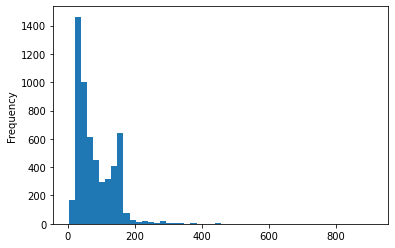

In [15]:
df_spam['length'].plot(bins=50, kind='hist')

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

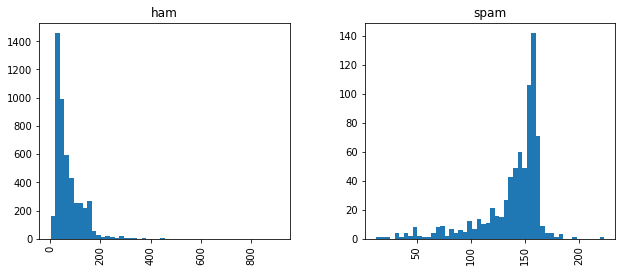

In [16]:
df_spam.hist(column='length', by='label', bins=50,figsize=(10,4))

### Encoding ham  to 0 and spam to 1

In [17]:
df_spam.loc[:,'label'] = df_spam.label.map({'ham':0, 'spam':1})
print(df_spam.shape)
df_spam.head()

(5572, 3)


,label,message,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [18]:
#separate both classes
df_ham_message = df_spam[df_spam['label'] == 0]
df_spam_message = df_spam[df_spam['label'] == 1]

#convert to list

ham_list=df_ham_message['message'].tolist()
spam_list= df_spam_message['message'].tolist()



filtered_spam = ("").join(spam_list) #convert the list into a string of spam
filtered_spam = filtered_spam.lower()

filtered_ham = ("").join(ham_list) #convert the list into a string of ham
filtered_ham = filtered_ham.lower()

In [19]:
from wordcloud import WordCloud
from PIL import Image
comment_mask = np.array(Image.open("comment.png"))


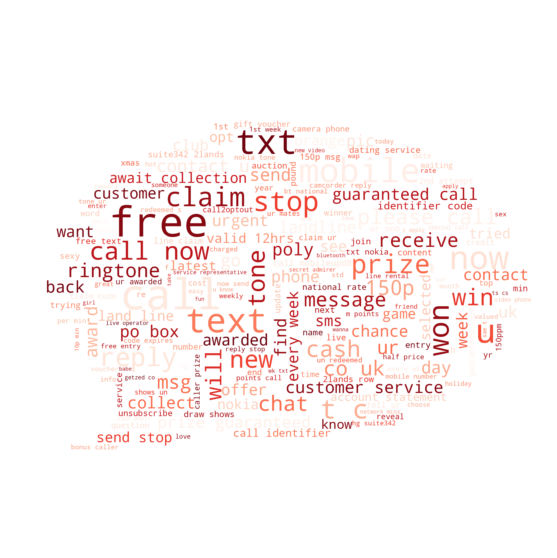

In [20]:
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size = 160, margin=0, mask = comment_mask,
                      background_color = "white", colormap="Reds").generate(filtered_spam)
 
# Display the generated image

plt.figure(figsize=[20,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.margins(x=0, y=0)

plt.show()


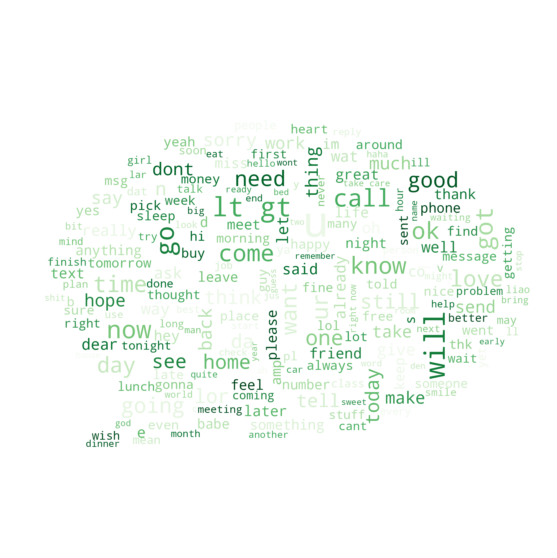

In [21]:
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size = 160, margin=0, mask = comment_mask, 
                      background_color = "white", colormap="Greens").generate(filtered_ham)
 
# Display the generated image

plt.figure(figsize=[20,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.margins(x=0, y=0)

plt.show()

Loading second data set

In [22]:
MORE_SPAM = "./datasets/spam/spam_ham_dataset.csv"
df_spam1 = pd.read_csv(MORE_SPAM)
df_spam1.head(10)

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
5,2949,ham,Subject: ehronline web address change\r\nthis ...,0
6,2793,ham,Subject: spring savings certificate - take 30 ...,0
7,4185,spam,Subject: looking for medication ? we ` re the ...,1
8,2641,ham,Subject: noms / actual flow for 2 / 26\r\nwe a...,0
9,1870,ham,"Subject: nominations for oct . 21 - 23 , 2000\...",0


In [23]:
df_spam1 = df_spam1.drop(["Unnamed: 0", "label"], axis=1)
df_spam1 = df_spam1.rename(columns={"label_num":"label", "text":"message"})
df_spam1.head()

,message,label
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


Checking for missing data

In [24]:
df_spam1.isna().sum()

message    0
label      0
dtype: int64

In [25]:
df_spam1.label.value_counts()

0    3672
1    1499
Name: label, dtype: int64

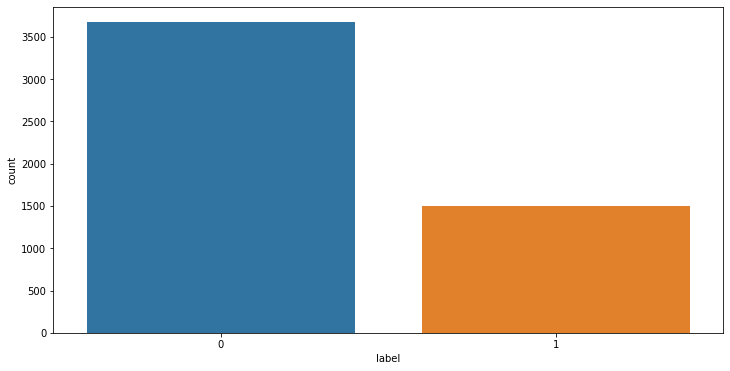

In [26]:
# Barplot describes the count of the class labels
plt.figure(figsize = (12, 6))
sns.countplot(data = df_spam1, x = 'label');

In [27]:

df = pd.concat([df_spam1, df_spam])
df = df.drop(['length'], axis=1)
df_ham_email = df[df.label == 0]
df_spam_email = df[df.label == 1]

print(df_ham_email.shape, df_spam_email.shape)

df.head()

(8497, 2) (2246, 2)


,message,label
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


Test, Train split

In [28]:
from sklearn.model_selection import train_test_split
# 30% test, 70% train split
x_train, x_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size = 0.3, random_state = 0)


print('rows in train set: ' + str(x_train.shape))
print('rows in test set: ' + str(x_test.shape))

rows in train set: (7520,)
rows in test set: (3223,)


# Word2vector transformation

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(
    strip_accents = ascii,
    lowercase=True,      # convert to lower case before tokenizing
    stop_words='english',
    max_df=0.5, # ignore terms that appear in more than 50% of the documents
    min_df=2 # only keep terms that appear in at least 2 documents
) #initialize countVectorizer.
word_count_vector=cv.fit_transform(x_train) #get the document-term matrix.
print(word_count_vector.shape)
type(word_count_vector)

(7520, 21721)


scipy.sparse.csr.csr_matrix

In [30]:
cv.vocabulary_

{'subject': 19671,
 'cd': 4749,
 'dvd': 7262,
 'expires': 8008,
 'soon': 19256,
 'half': 9249,
 'com': 5360,
 'free': 8597,
 'coupon': 5968,
 'new': 13537,
 'site': 19066,
 'cds': 4753,
 'books': 3986,
 'movies': 12128,
 'video': 21016,
 'games': 8749,
 '50': 1073,
 '90': 1731,
 '10': 171,
 'order': 16263,
 'plus': 16947,
 'shipping': 18911,
 'items': 10403,
 'sure': 19797,
 'pass': 16522,
 'friends': 8635,
 'nclick': 13004,
 'bucks': 4260,
 'nyour': 16026,
 'code': 5264,
 'lifestyle': 11080,
 'use': 20836,
 'lose': 11281,
 'nthe': 15622,
 'hottest': 9710,
 'titles': 20286,
 'including': 10007,
 'dixie': 6979,
 'jay': 10465,
 'christina': 5024,
 'project': 17318,
 'sixth': 19079,
 'sense': 18757,
 'matrix': 11620,
 'world': 21493,
 'blair': 3840,
 'witch': 21421,
 'non': 14672,
 'shopping': 18936,
 'cart': 4636,
 'page': 16412,
 'enter': 7693,
 '00': 0,
 'right': 18209,
 'submitting': 19678,
 'displayed': 6926,
 'nshopping': 15367,
 'nyou': 16024,
 'received': 17722,
 'invitation': 103

# Model selecion

Multinomial Naive Bayes Model

In [31]:
# Transforming test data
x_test_transformed = cv.transform(x_test)

In [32]:
%%timeit
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score

# train a classifier
multinomialNB_clf = MultinomialNB()
scores=cross_val_score(multinomialNB_clf,word_count_vector,y_train,cv=10,scoring='accuracy', verbose=3)

# print(scores)

print(scores.mean())


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concur

[CV] END ................................ score: (test=0.938) total time=   0.0s
[CV] END ................................ score: (test=0.919) total time=   0.0s
[CV] END ................................ score: (test=0.924) total time=   0.0s
[CV] END ................................ score: (test=0.926) total time=   0.0s
[CV] END ................................ score: (test=0.923) total time=   0.0s
[CV] END ................................ score: (test=0.930) total time=   0.0s
[CV] END ................................ score: (test=0.926) total time=   0.0s
[CV] END ................................ score: (test=0.930) total time=   0.0s
[CV] END ................................ score: (test=0.951) total time=   0.0s
[CV] END ................................ score: (test=0.936) total time=   0.0s
0.9300531914893618
[CV] END ................................ score: (test=0.938) total time=   0.0s
[CV] END ................................ score: (test=0.919) total time=   0.0s
[CV] END 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remain

[CV] END ................................ score: (test=0.919) total time=   0.0s
[CV] END ................................ score: (test=0.924) total time=   0.0s
[CV] END ................................ score: (test=0.926) total time=   0.0s
[CV] END ................................ score: (test=0.923) total time=   0.0s
[CV] END ................................ score: (test=0.930) total time=   0.0s
[CV] END ................................ score: (test=0.926) total time=   0.0s
[CV] END ................................ score: (test=0.930) total time=   0.0s
[CV] END ................................ score: (test=0.951) total time=   0.0s
[CV] END ................................ score: (test=0.936) total time=   0.0s
0.9300531914893618
[CV] END ................................ score: (test=0.938) total time=   0.0s
[CV] END ................................ score: (test=0.919) total time=   0.0s
[CV] END ................................ score: (test=0.924) total time=   0.0s
[CV] END 

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finish

[CV] END ................................ score: (test=0.938) total time=   0.0s
[CV] END ................................ score: (test=0.919) total time=   0.0s
[CV] END ................................ score: (test=0.924) total time=   0.0s
[CV] END ................................ score: (test=0.926) total time=   0.0s
[CV] END ................................ score: (test=0.923) total time=   0.0s
[CV] END ................................ score: (test=0.930) total time=   0.0s
[CV] END ................................ score: (test=0.926) total time=   0.0s
[CV] END ................................ score: (test=0.930) total time=   0.0s
[CV] END ................................ score: (test=0.951) total time=   0.0s
[CV] END ................................ score: (test=0.936) total time=   0.0s
0.9300531914893618
[CV] END ................................ score: (test=0.938) total time=   0.0s
[CV] END ................................ score: (test=0.919) total time=   0.0s
[CV] END 

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finish

[CV] END ................................ score: (test=0.938) total time=   0.0s
[CV] END ................................ score: (test=0.919) total time=   0.0s
[CV] END ................................ score: (test=0.924) total time=   0.0s
[CV] END ................................ score: (test=0.926) total time=   0.0s
[CV] END ................................ score: (test=0.923) total time=   0.0s
[CV] END ................................ score: (test=0.930) total time=   0.0s
[CV] END ................................ score: (test=0.926) total time=   0.0s
[CV] END ................................ score: (test=0.930) total time=   0.0s
[CV] END ................................ score: (test=0.951) total time=   0.0s
[CV] END ................................ score: (test=0.936) total time=   0.0s
0.9300531914893618
[CV] END ................................ score: (test=0.938) total time=   0.0s
[CV] END ................................ score: (test=0.919) total time=   0.0s
[CV] END 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remain

[CV] END ................................ score: (test=0.938) total time=   0.0s
[CV] END ................................ score: (test=0.919) total time=   0.0s
[CV] END ................................ score: (test=0.924) total time=   0.0s
[CV] END ................................ score: (test=0.926) total time=   0.0s
[CV] END ................................ score: (test=0.923) total time=   0.0s
[CV] END ................................ score: (test=0.930) total time=   0.0s
[CV] END ................................ score: (test=0.926) total time=   0.0s
[CV] END ................................ score: (test=0.930) total time=   0.0s
[CV] END ................................ score: (test=0.951) total time=   0.0s
[CV] END ................................ score: (test=0.936) total time=   0.0s
0.9300531914893618
[CV] END ................................ score: (test=0.938) total time=   0.0s
[CV] END ................................ score: (test=0.919) total time=   0.0s
[CV] END 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remain

[CV] END ................................ score: (test=0.951) total time=   0.0s
[CV] END ................................ score: (test=0.936) total time=   0.0s
0.9300531914893618
[CV] END ................................ score: (test=0.938) total time=   0.0s
[CV] END ................................ score: (test=0.919) total time=   0.0s
[CV] END ................................ score: (test=0.924) total time=   0.0s
[CV] END ................................ score: (test=0.926) total time=   0.0s
[CV] END ................................ score: (test=0.923) total time=   0.0s
[CV] END ................................ score: (test=0.930) total time=   0.0s
[CV] END ................................ score: (test=0.926) total time=   0.0s
[CV] END ................................ score: (test=0.930) total time=   0.0s
[CV] END ................................ score: (test=0.951) total time=   0.0s
[CV] END ................................ score: (test=0.936) total time=   0.0s
0.9300531

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finish

[CV] END ................................ score: (test=0.923) total time=   0.0s
[CV] END ................................ score: (test=0.930) total time=   0.0s
[CV] END ................................ score: (test=0.926) total time=   0.0s
[CV] END ................................ score: (test=0.930) total time=   0.0s
[CV] END ................................ score: (test=0.951) total time=   0.0s
[CV] END ................................ score: (test=0.936) total time=   0.0s
0.9300531914893618
[CV] END ................................ score: (test=0.938) total time=   0.0s
[CV] END ................................ score: (test=0.919) total time=   0.0s
[CV] END ................................ score: (test=0.924) total time=   0.0s
[CV] END ................................ score: (test=0.926) total time=   0.0s
[CV] END ................................ score: (test=0.923) total time=   0.0s
[CV] END ................................ score: (test=0.930) total time=   0.0s
[CV] END 

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finish

[CV] END ................................ score: (test=0.938) total time=   0.0s
[CV] END ................................ score: (test=0.919) total time=   0.0s
[CV] END ................................ score: (test=0.924) total time=   0.0s
[CV] END ................................ score: (test=0.926) total time=   0.0s
[CV] END ................................ score: (test=0.923) total time=   0.0s
[CV] END ................................ score: (test=0.930) total time=   0.0s
[CV] END ................................ score: (test=0.926) total time=   0.0s
[CV] END ................................ score: (test=0.930) total time=   0.0s
[CV] END ................................ score: (test=0.951) total time=   0.0s
[CV] END ................................ score: (test=0.936) total time=   0.0s
0.9300531914893618
[CV] END ................................ score: (test=0.938) total time=   0.0s
[CV] END ................................ score: (test=0.919) total time=   0.0s
[CV] END 

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finish

[CV] END ................................ score: (test=0.951) total time=   0.0s
[CV] END ................................ score: (test=0.936) total time=   0.0s
0.9300531914893618
[CV] END ................................ score: (test=0.938) total time=   0.0s
[CV] END ................................ score: (test=0.919) total time=   0.0s
[CV] END ................................ score: (test=0.924) total time=   0.0s
[CV] END ................................ score: (test=0.926) total time=   0.0s
[CV] END ................................ score: (test=0.923) total time=   0.0s
[CV] END ................................ score: (test=0.930) total time=   0.0s
[CV] END ................................ score: (test=0.926) total time=   0.0s
[CV] END ................................ score: (test=0.930) total time=   0.0s
[CV] END ................................ score: (test=0.951) total time=   0.0s
[CV] END ................................ score: (test=0.936) total time=   0.0s
0.9300531

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finish

[CV] END ................................ score: (test=0.930) total time=   0.0s
[CV] END ................................ score: (test=0.951) total time=   0.0s
[CV] END ................................ score: (test=0.936) total time=   0.0s
0.9300531914893618
[CV] END ................................ score: (test=0.938) total time=   0.0s
[CV] END ................................ score: (test=0.919) total time=   0.0s
[CV] END ................................ score: (test=0.924) total time=   0.0s
[CV] END ................................ score: (test=0.926) total time=   0.0s
[CV] END ................................ score: (test=0.923) total time=   0.0s
[CV] END ................................ score: (test=0.930) total time=   0.0s
[CV] END ................................ score: (test=0.926) total time=   0.0s
[CV] END ................................ score: (test=0.930) total time=   0.0s
[CV] END ................................ score: (test=0.951) total time=   0.0s
[CV] END 

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finish

[CV] END ................................ score: (test=0.930) total time=   0.0s
[CV] END ................................ score: (test=0.951) total time=   0.0s
[CV] END ................................ score: (test=0.936) total time=   0.0s
0.9300531914893618
[CV] END ................................ score: (test=0.938) total time=   0.0s
[CV] END ................................ score: (test=0.919) total time=   0.0s
[CV] END ................................ score: (test=0.924) total time=   0.0s
[CV] END ................................ score: (test=0.926) total time=   0.0s
[CV] END ................................ score: (test=0.923) total time=   0.0s
[CV] END ................................ score: (test=0.930) total time=   0.0s
[CV] END ................................ score: (test=0.926) total time=   0.0s
[CV] END ................................ score: (test=0.930) total time=   0.0s
[CV] END ................................ score: (test=0.951) total time=   0.0s
[CV] END 

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finish

[CV] END ................................ score: (test=0.930) total time=   0.0s
[CV] END ................................ score: (test=0.951) total time=   0.0s
[CV] END ................................ score: (test=0.936) total time=   0.0s
0.9300531914893618
[CV] END ................................ score: (test=0.938) total time=   0.0s
[CV] END ................................ score: (test=0.919) total time=   0.0s
[CV] END ................................ score: (test=0.924) total time=   0.0s
[CV] END ................................ score: (test=0.926) total time=   0.0s
[CV] END ................................ score: (test=0.923) total time=   0.0s
[CV] END ................................ score: (test=0.930) total time=   0.0s
[CV] END ................................ score: (test=0.926) total time=   0.0s
[CV] END ................................ score: (test=0.930) total time=   0.0s
[CV] END ................................ score: (test=0.951) total time=   0.0s
[CV] END 

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finish

[CV] END ................................ score: (test=0.951) total time=   0.0s
[CV] END ................................ score: (test=0.936) total time=   0.0s
0.9300531914893618
[CV] END ................................ score: (test=0.938) total time=   0.0s
[CV] END ................................ score: (test=0.919) total time=   0.0s
[CV] END ................................ score: (test=0.924) total time=   0.0s
[CV] END ................................ score: (test=0.926) total time=   0.0s
[CV] END ................................ score: (test=0.923) total time=   0.0s
[CV] END ................................ score: (test=0.930) total time=   0.0s
[CV] END ................................ score: (test=0.926) total time=   0.0s
[CV] END ................................ score: (test=0.930) total time=   0.0s
[CV] END ................................ score: (test=0.951) total time=   0.0s
[CV] END ................................ score: (test=0.936) total time=   0.0s
0.9300531

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concur

[CV] END ................................ score: (test=0.936) total time=   0.0s
0.9300531914893618
[CV] END ................................ score: (test=0.938) total time=   0.0s
[CV] END ................................ score: (test=0.919) total time=   0.0s
[CV] END ................................ score: (test=0.924) total time=   0.0s
[CV] END ................................ score: (test=0.926) total time=   0.0s
[CV] END ................................ score: (test=0.923) total time=   0.0s
[CV] END ................................ score: (test=0.930) total time=   0.0s
[CV] END ................................ score: (test=0.926) total time=   0.0s
[CV] END ................................ score: (test=0.930) total time=   0.0s
[CV] END ................................ score: (test=0.951) total time=   0.0s
[CV] END ................................ score: (test=0.936) total time=   0.0s
0.9300531914893618
[CV] END ................................ score: (test=0.938) total tim

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concur

[CV] END ................................ score: (test=0.936) total time=   0.0s
0.9300531914893618
[CV] END ................................ score: (test=0.938) total time=   0.0s
[CV] END ................................ score: (test=0.919) total time=   0.0s
[CV] END ................................ score: (test=0.924) total time=   0.0s
[CV] END ................................ score: (test=0.926) total time=   0.0s
[CV] END ................................ score: (test=0.923) total time=   0.0s
[CV] END ................................ score: (test=0.930) total time=   0.0s
[CV] END ................................ score: (test=0.926) total time=   0.0s
[CV] END ................................ score: (test=0.930) total time=   0.0s
[CV] END ................................ score: (test=0.951) total time=   0.0s
[CV] END ................................ score: (test=0.936) total time=   0.0s
0.9300531914893618
[CV] END ................................ score: (test=0.938) total tim

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finish

[CV] END ................................ score: (test=0.923) total time=   0.0s
[CV] END ................................ score: (test=0.930) total time=   0.0s
[CV] END ................................ score: (test=0.926) total time=   0.0s
[CV] END ................................ score: (test=0.930) total time=   0.0s
[CV] END ................................ score: (test=0.951) total time=   0.0s
[CV] END ................................ score: (test=0.936) total time=   0.0s
0.9300531914893618
[CV] END ................................ score: (test=0.938) total time=   0.0s
[CV] END ................................ score: (test=0.919) total time=   0.0s
[CV] END ................................ score: (test=0.924) total time=   0.0s
[CV] END ................................ score: (test=0.926) total time=   0.0s
[CV] END ................................ score: (test=0.923) total time=   0.0s
[CV] END ................................ score: (test=0.930) total time=   0.0s
[CV] END 

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finish

[CV] END ................................ score: (test=0.930) total time=   0.0s
[CV] END ................................ score: (test=0.951) total time=   0.0s
[CV] END ................................ score: (test=0.936) total time=   0.0s
0.9300531914893618
[CV] END ................................ score: (test=0.938) total time=   0.0s
[CV] END ................................ score: (test=0.919) total time=   0.0s
[CV] END ................................ score: (test=0.924) total time=   0.0s
[CV] END ................................ score: (test=0.926) total time=   0.0s
[CV] END ................................ score: (test=0.923) total time=   0.0s
[CV] END ................................ score: (test=0.930) total time=   0.0s
[CV] END ................................ score: (test=0.926) total time=   0.0s
[CV] END ................................ score: (test=0.930) total time=   0.0s
[CV] END ................................ score: (test=0.951) total time=   0.0s
[CV] END 

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finish

[CV] END ................................ score: (test=0.926) total time=   0.0s
[CV] END ................................ score: (test=0.923) total time=   0.0s
[CV] END ................................ score: (test=0.930) total time=   0.0s
[CV] END ................................ score: (test=0.926) total time=   0.0s
[CV] END ................................ score: (test=0.930) total time=   0.0s
[CV] END ................................ score: (test=0.951) total time=   0.0s
[CV] END ................................ score: (test=0.936) total time=   0.0s
0.9300531914893618
[CV] END ................................ score: (test=0.938) total time=   0.0s
[CV] END ................................ score: (test=0.919) total time=   0.0s
[CV] END ................................ score: (test=0.924) total time=   0.0s
[CV] END ................................ score: (test=0.926) total time=   0.0s
[CV] END ................................ score: (test=0.923) total time=   0.0s
[CV] END 

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finish

[CV] END ................................ score: (test=0.930) total time=   0.0s
[CV] END ................................ score: (test=0.951) total time=   0.0s
[CV] END ................................ score: (test=0.936) total time=   0.0s
0.9300531914893618
[CV] END ................................ score: (test=0.938) total time=   0.0s
[CV] END ................................ score: (test=0.919) total time=   0.0s
[CV] END ................................ score: (test=0.924) total time=   0.0s
[CV] END ................................ score: (test=0.926) total time=   0.0s
[CV] END ................................ score: (test=0.923) total time=   0.0s
[CV] END ................................ score: (test=0.930) total time=   0.0s
[CV] END ................................ score: (test=0.926) total time=   0.0s
[CV] END ................................ score: (test=0.930) total time=   0.0s
[CV] END ................................ score: (test=0.951) total time=   0.0s
[CV] END 

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finish

[CV] END ................................ score: (test=0.924) total time=   0.0s
[CV] END ................................ score: (test=0.926) total time=   0.0s
[CV] END ................................ score: (test=0.923) total time=   0.0s
[CV] END ................................ score: (test=0.930) total time=   0.0s
[CV] END ................................ score: (test=0.926) total time=   0.0s
[CV] END ................................ score: (test=0.930) total time=   0.0s
[CV] END ................................ score: (test=0.951) total time=   0.0s
[CV] END ................................ score: (test=0.936) total time=   0.0s
0.9300531914893618
[CV] END ................................ score: (test=0.938) total time=   0.0s
[CV] END ................................ score: (test=0.919) total time=   0.0s
[CV] END ................................ score: (test=0.924) total time=   0.0s
[CV] END ................................ score: (test=0.926) total time=   0.0s
[CV] END 

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


# Support Vector Machines

In [307]:
from sklearn.svm import SVC

svm_clf = SVC()
scores=cross_val_score(svm_clf,word_count_vector,y_train,cv=10,scoring='accuracy', verbose=3)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ................................ score: (test=0.935) total time=   4.9s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.9s remaining:    0.0s


[CV] END ................................ score: (test=0.923) total time=   4.9s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.8s remaining:    0.0s


[CV] END ................................ score: (test=0.920) total time=   5.1s
[CV] END ................................ score: (test=0.924) total time=   4.9s
[CV] END ................................ score: (test=0.927) total time=   5.5s
[CV] END ................................ score: (test=0.940) total time=   5.3s
[CV] END ................................ score: (test=0.940) total time=   5.1s
[CV] END ................................ score: (test=0.939) total time=   5.0s
[CV] END ................................ score: (test=0.923) total time=   4.8s
[CV] END ................................ score: (test=0.928) total time=   4.9s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   50.4s finished


## Logistic Regression 

In [298]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log_clf = LogisticRegression(solver="lbfgs", max_iter=1000, random_state=42)
score = cross_val_score(log_clf, word_count_vector, y_train, cv=3, verbose=3)
score.mean()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ................................ score: (test=0.968) total time=   0.4s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] END ................................ score: (test=0.973) total time=   0.3s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


[CV] END ................................ score: (test=0.974) total time=   0.3s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.0s finished


0.9718088102979122

# Random forest 

In [306]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_scores = cross_val_score(forest_clf, word_count_vector, y_train, cv=10)
forest_scores.mean()


0.9768617021276595

In [309]:
forest_clf.fit(word_count_vector, y_train)
y_pred = log_clf.predict(x_test_transformed)
print("Precision: {:.2f}%".format(100 * precision_score(y_test, y_pred)))
print("Recall: {:.2f}%".format(100 * recall_score(y_test, y_pred)))

Precision: 95.34%
Recall: 92.33%


# Conclusion
In this notebook we have tried to implement a spam filter using different ML classifier.
Among the models Logistic Regression and Random forest have given best Precision and Recall rate.


> below is the final prediction using LogisticRegression model

In [301]:
from sklearn.metrics import precision_score, recall_score



log_clf = LogisticRegression(solver="lbfgs", max_iter=1000, random_state=42)
log_clf.fit(word_count_vector, y_train)

y_pred = log_clf.predict(x_test_transformed)

print("Precision: {:.2f}%".format(100 * precision_score(y_test, y_pred)))
print("Recall: {:.2f}%".format(100 * recall_score(y_test, y_pred)))

Precision: 95.34%
Recall: 92.33%


In [304]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

results = confusion_matrix(y_test, y_pred) 
  
print('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(y_test, y_pred)) 
print ('Report : ')
print (classification_report(y_test, y_pred) )

score_2 = f1_score(y_test, y_pred, average = 'binary')
print('F-Measure: %.3f' % score_2)

Confusion Matrix :
[[2528   30]
 [  51  614]]
Accuracy Score : 0.9748681352776916
Report : 
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2558
           1       0.95      0.92      0.94       665

    accuracy                           0.97      3223
   macro avg       0.97      0.96      0.96      3223
weighted avg       0.97      0.97      0.97      3223

F-Measure: 0.938


<AxesSubplot:>

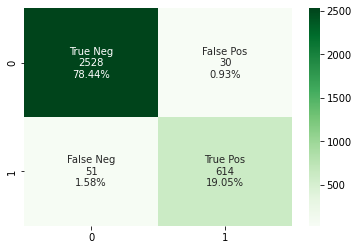

In [305]:
#heatmap for confusion matrix

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                results.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     results.flatten()/np.sum(results)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(results, annot=labels, fmt='', cmap='Greens')